<center><font size=6> Bank Churn Prediction </font></center>


## Problem Statement


### Context


Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.


### Objective


You as a Data scientist with the bank need to build a neural network based classifier that can determine whether a customer will leave the bank or not in the next 6 months.


### Data Dictionary


- CustomerId: Unique ID which is assigned to each customer

- Surname: Last name of the customer

- CreditScore: It defines the credit history of the customer.
- Geography: A customer’s location
- Gender: It defines the Gender of the customer
- Age: Age of the customer
- Tenure: Number of years for which the customer has been with the bank

- NumOfProducts: refers to the number of products that a customer has purchased through the bank.

- Balance: Account balance

- HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

- EstimatedSalary: Estimated salary

- isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

- Exited : whether or not the customer left the bank within six month. It can take two values
  ** 0=No ( Customer did not leave the bank )
  ** 1=Yes ( Customer left the bank )


## Importing necessary libraries


In [63]:
#https://github.com/sureshdpawar/deep-learning-back-churn-project-4/blob/master/INN_Learner_Notebook_Full_code_version-v6.ipynb
#https://github.com/NatenaelTBekele/Bank_Churn_Prediction-/blob/main/Bank%20Churn%20Prediction.ipynb

# Data manipulation and analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# TensorFlow and Keras for neural network architecture
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn import preprocessing
import sklearn
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
# Utility to suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset


In [3]:
# Load the dataset from a CSV file
ds = pd.read_csv("Churn.csv")

## Data Overview


In [4]:
# Display the shape of the dataset
print("Dataset Shape:", ds.shape)

Dataset Shape: (10000, 14)


In [5]:
# Get a summary of data types and detect missing values
print("Data Types and Missing Values:")
print(ds.info())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [6]:
# Preview the first few rows of the dataset
print("First 10 Rows:")
print(ds.head(10))

First 10 Rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1   

In [7]:
# Display statistical summaries for numerical features
print("Statistical Summary for Numerical Features:")
print(ds.describe().T)

Statistical Summary for Numerical Features:
                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+0

In [8]:
# Display statistical summaries for categorical features
print("Statistical Summary for Categorical Features:")
print(ds.describe(include=['object']).T)

Statistical Summary for Categorical Features:
           count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457


### Drop the columns which are unique for all users like IDs


In [9]:
# Drop columns that are unique for all users as they do not contribute to model performance
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)



In [10]:
# Display the updated DataFrame to confirm columns are dropped
print(ds.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


# Observations on data 

**Dataset Structure:**

-The dataset consists of 10,000 rows and 14 columns.

**Feature Distribution:**

-There are 11 numerical columns, providing quantitative data.
-There are 3 non-numerical columns, of which 2 are categorical (Geography and Gender). The third set includes identifiers such as RowNumber, CustomerId, and Surname.

**Data Completeness:**

-There are no missing values in the dataset, ensuring a complete dataset for analysis.

**Unique Identifiers:**

-We have removed the columns RowNumber, CustomerId, and Surname as they are unique for each record and do not contribute to model effectiveness.

**Categorical Variables:**

-Geography: This feature has three unique values (France, Germany, Spain), with France having the highest frequency of occurrences (5,014).

-Gender: There are two unique values (Male and Female), with Male being more frequent (5,457 instances).

## Exploratory Data Analysis


In [12]:
def combined_hist_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    This function creates a combined boxplot and histogram on the same scale.
    
    data: DataFrame containing the data
    feature: The column within the DataFrame to visualize
    figsize: Tuple representing the figure size, defaults to (12,7)
    kde: Boolean indicating if a kernel density estimate is plotted, defaults to False
    bins: Optional integer specifying the number of bins for the histogram, defaults to None
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Setup 2 rows for subplots
        sharex=True,  # Both plots share the same x-axis
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # Adjust the height ratio of the boxplot to histogram
        figsize=figsize  # Set the figure size
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True, color="skyblue"
    )  # Create the boxplot with the mean indicated
    if bins:  # Check if bins parameter is provided
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, color="blue"
        )  # Create the histogram with specified bins
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist, color="blue"
        )  # Create the histogram without specified bins
    ax_hist.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Mark the mean on the histogram
    ax_hist.axvline(
        data[feature].median(), color="purple", linestyle="-"
    )  # Mark the median on the histogram


In [14]:
def annotated_barplot(data, feature, percentage=False, top_n=None):
    """
    Generates a bar plot with labels on each bar. Labels can be either counts or percentages.

    data: DataFrame containing the data
    feature: Column to be visualized
    percentage: Bool, if True, labels show percentages, defaults to False
    top_n: Only the top 'n' categories are displayed, defaults to None (shows all categories)
    """

    total_entries = len(data[feature])  # Total entries for the feature
    unique_categories = data[feature].nunique()  # Number of unique categories
    fig_width = unique_categories + 1 if top_n is None else top_n + 1

    plt.figure(figsize=(fig_width, 5))  # Set the figure size dynamically based on the number of categories
    plt.xticks(rotation=90, fontsize=15)  # Rotate labels for better readability
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="coolwarm",  # Changed color palette
        order=data[feature].value_counts().nlargest(top_n).index if top_n else data[feature].value_counts().index
    )

    for patch in ax.patches:
        height = patch.get_height()  # Get the height of the bar
        label = "{:.1f}%".format(100 * height / total_entries) if percentage else int(height)
        # Position for the label
        x = patch.get_x() + patch.get_width() / 2
        y = height

        ax.annotate(
            label, 
            (x, y), 
            ha='center', 
            va='bottom', 
            fontsize=12, 
            xytext=(0, 5), 
            textcoords='offset points'
        )  # Place the text at the top of the bar

    plt.show()  # Display the plot


In [15]:
def plot_stacked_bar_chart(data, independent_var, dependent_var):
    """
    Displays category counts and plots a stacked bar chart.

    data: DataFrame containing the dataset
    independent_var: The predictor variable (categorical)
    dependent_var: The response variable (categorical)
    """
    unique_count = data[independent_var].nunique()
    least_frequent = data[dependent_var].value_counts().index[-1]  # Focus on the least frequent category
    crosstab_all = pd.crosstab(data[independent_var], data[dependent_var], margins=True).sort_values(
        by=least_frequent, ascending=False
    )
    print(crosstab_all)
    print("-" * 120)
    crosstab_normalized = pd.crosstab(data[independent_var], data[dependent_var], normalize="index").sort_values(
        by=least_frequent, ascending=False
    )
    # Plotting the stacked bar chart
    crosstab_normalized.plot(kind="bar", stacked=True, figsize=(unique_count + 1, 5))
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Adjust legend placement
    plt.show()


In [16]:
def visualize_distributions(data, feature, response):
    """
    Generates a set of plots to visualize the distribution of a feature conditioned on a response variable.

    data: DataFrame - The dataset containing the features.
    feature: string - The name of the feature to analyze.
    response: string - The target variable based on which distributions are conditioned.
    """
    # Create a 2x2 subplot layout
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Retrieve unique values of the response variable
    response_values = data[response].unique()

    # Distribution plots for each unique response value
    axes[0, 0].set_title(f"Distribution for {response} = {response_values[0]}")
    sns.histplot(
        data=data[data[response] == response_values[0]],
        x=feature,
        kde=True,
        ax=axes[0, 0],
        color="navy",  # Changed color for visual appeal
    )

    axes[0, 1].set_title(f"Distribution for {response} = {response_values[1]}")
    sns.histplot(
        data=data[data[response] == response_values[1]],
        x=feature,
        kde=True,
        ax=axes[0, 1],
        color="crimson",  # Changed color for visual distinction
    )

    # Boxplot comparing the feature across different response categories
    axes[1, 0].set_title("Comparative Boxplot by Response")
    sns.boxplot(
        data=data,
        x=response,
        y=feature,
        ax=axes[1, 0],
        palette="viridis"  # Updated color palette
    )

    # Boxplot without outliers for clear comparison
    axes[1, 1].set_title("Boxplot (No Outliers) by Response")
    sns.boxplot(
        data=data,
        x=response,
        y=feature,
        showfliers=False,  # Suppress outliers for clarity
        ax=axes[1, 1],
        palette="viridis"
    )

    plt.tight_layout()
    plt.show()


### Univariate Analysis


#### Observation on Numerical variables ####

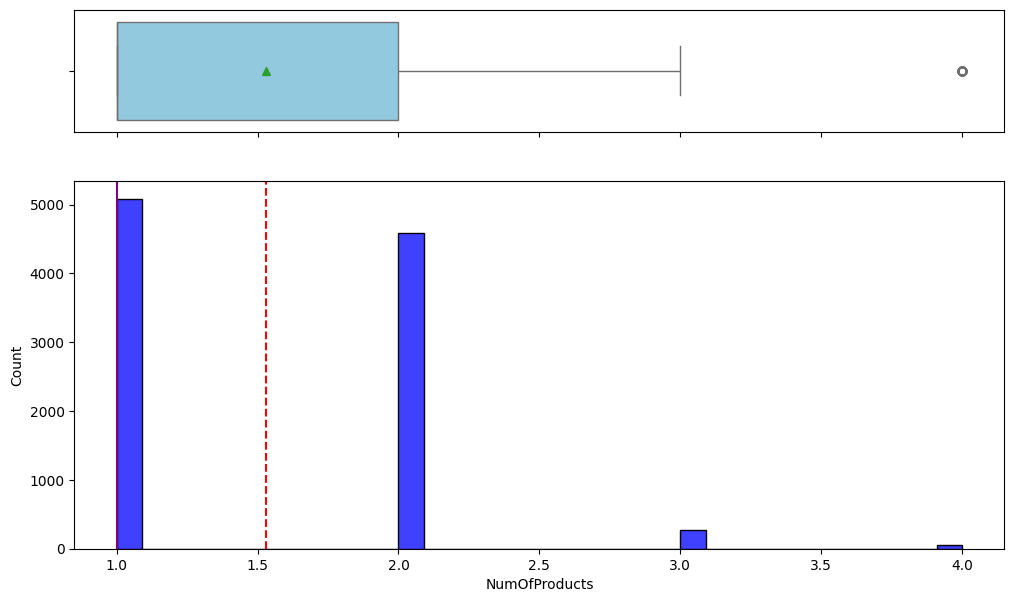

In [22]:
# Observations on NumOfProducts
combined_hist_boxplot(ds, "NumOfProducts")

**Observations on NumOfProducts**

***Distribution Characteristics:*** Majority of customers hold 1 or 2 banking products. Notably, the number of customers holding 1 product is slightly higher than those holding 2.

***Central Tendency:*** The median number of products held by customers, as indicated by the green triangle in the boxplot, is 1. This suggests that most customers prefer to maintain a simpler banking relationship.

***Outliers and Extremes:*** There are a few customers who hold 3 or 4 products, but these are relatively rare and appear as outliers in the boxplot. Their small numbers compared to the rest of the dataset indicate that such banking habits are not the norm.

***Range of Products:*** The count of customers significantly drops for those holding 3 products and further decreases for those with 4, underscoring a limited demand or eligibility for holding multiple banking products.

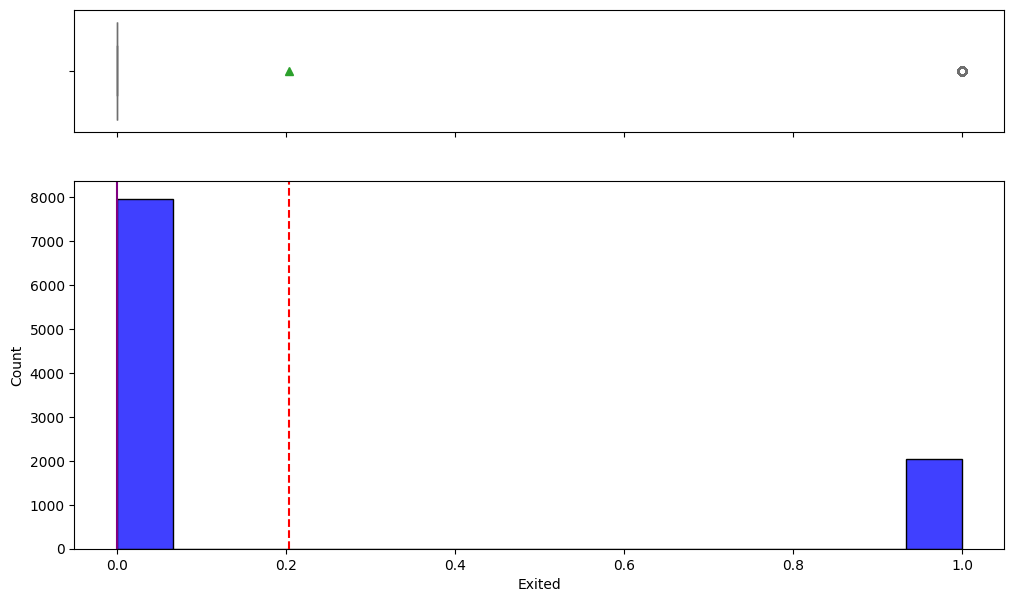

In [20]:
# Observations on Exited
combined_hist_boxplot(ds, "Exited")

**Observations on Exited**

***Binary Distribution:*** The "Exited" variable is clearly binary, indicating two possible states for customers: 0 (not exited) and 1 (exited).

***Customer Churn Proportion:*** Approximately 20% of the customers have exited, as shown by the substantial but smaller count of the '1' category in the histogram compared to the '0' category. This indicates a churn rate that could warrant further analysis to understand the underlying reasons and factors contributing to customer departure.

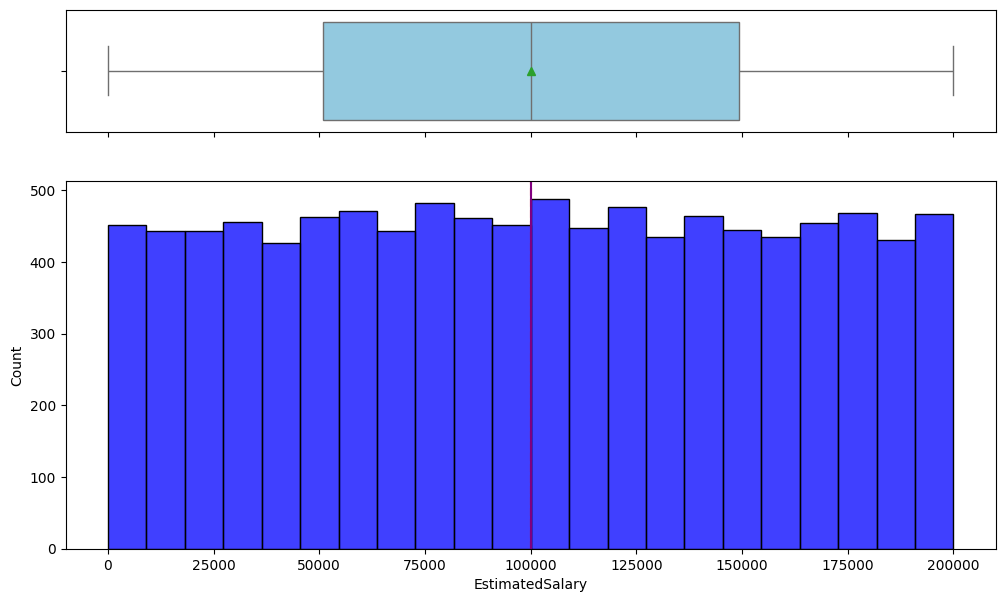

In [21]:
# Observations on EstimatedSalary
combined_hist_boxplot(ds, "EstimatedSalary")


**Observations on EstimatedSalary**

***Distribution Characteristics:*** The histogram for "EstimatedSalary" indicates a uniform distribution across various salary ranges. The data is evenly spread from the lowest to the highest salaries.

***Central Tendency:*** The median of the estimated salary, as depicted by the green triangle in the boxplot, is approximately £100,090, aligning closely with the middle of the salary range.

***Outlier Analysis:*** The boxplot shows no outliers in the salary data, which suggests that all values fall within a typical range without extreme deviations.

***Range Consistency:*** The distribution covers a wide range of salaries from nearly £0 up to £200,000, with each salary band receiving similar representation in the dataset.

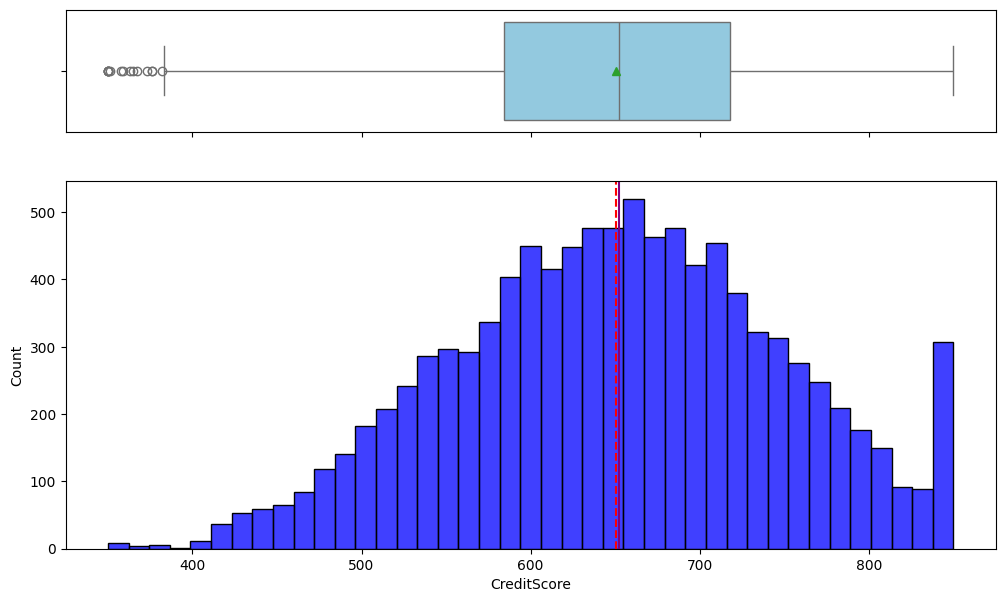

In [17]:
# Observations on CreditScore
combined_hist_boxplot(ds, "CreditScore")


**Observations on CreditScore**

***Distribution Shape:*** The "CreditScore" exhibits a normal distribution, indicating a symmetrical spread around the central value.

***Central Value:*** The median credit score is approximately 650, which suggests that half of the customers have a credit score below this value, and the other half have a score above it.

***Outliers:*** There are a few outliers present at the lower end of the distribution. Given their limited number, they may not require treatment or could be a focus for specific analysis to understand their cause.

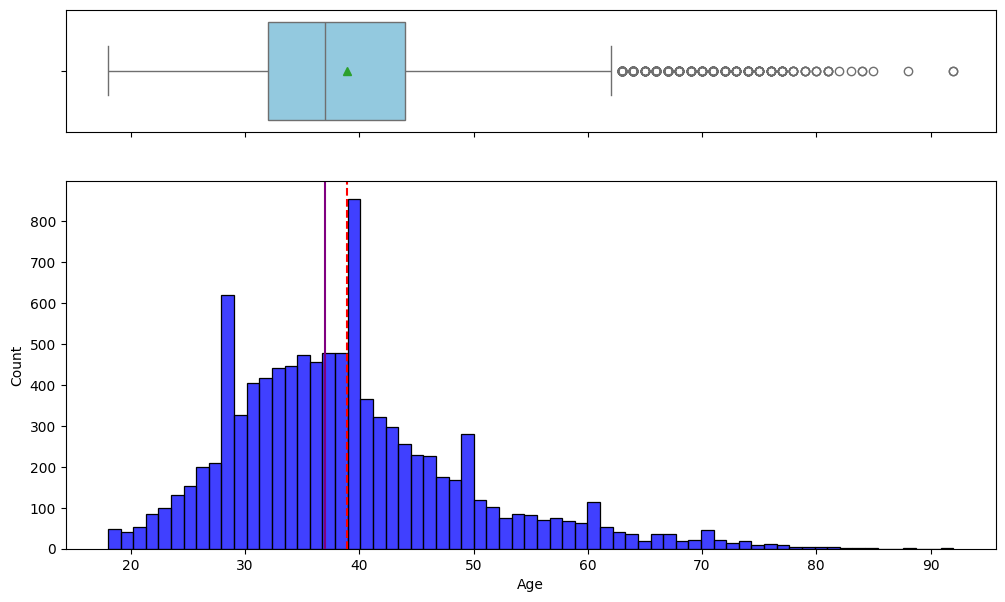

In [18]:
# Observations on Age
combined_hist_boxplot(ds, "Age")

**Observations on Age**

***Distribution Characteristics:*** The distribution of "Age" is right-skewed, indicating a larger number of younger customers compared to older ones. The bulk of the data is concentrated between ages 30 and 40.

***Central Value:*** The median age, indicated by the solid black line on the histogram, is around 37 years. This value represents the middle point of the dataset, where half of the customers are younger and half are older.

***Outliers:*** The boxplot shows several outliers on the upper end, representing older age groups that deviate significantly from the rest of the population.
High Age Range: While the majority of customers are under 60, there are notable counts extending into the 70s and beyond, which might represent a smaller, yet significant, segment of the bank’s customer base.

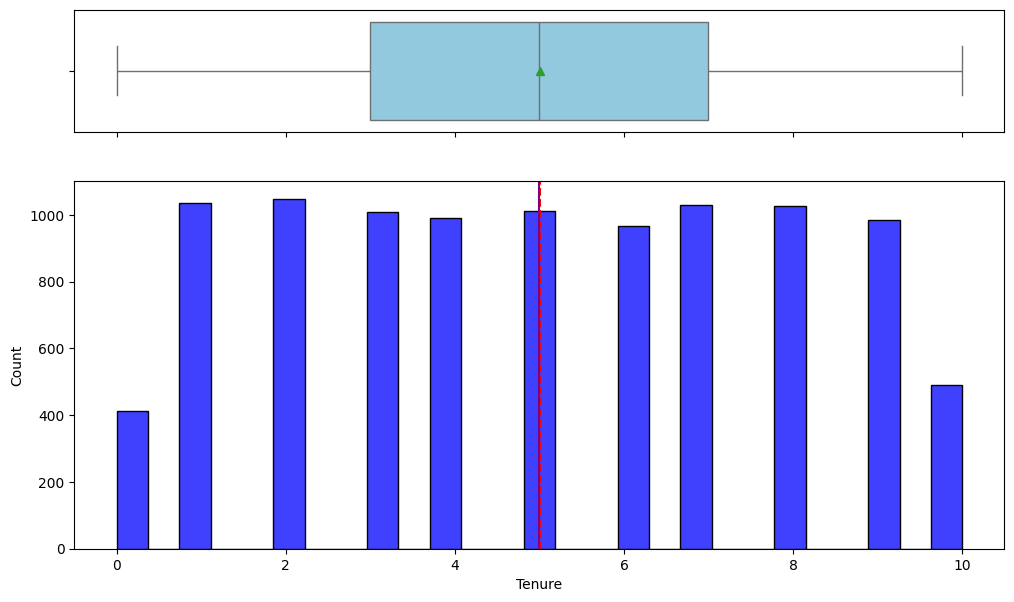

In [19]:
# Observations on Tenure
combined_hist_boxplot(ds, "Tenure")

**Observations on Tenure**

***Uniform Distribution:*** The histogram of "Tenure" across customers is relatively uniform for most of its range, with no significant peaks suggesting equal likelihood across most tenure years.

***Central Tendency:*** The median tenure is around 5 years, as indicated by the green triangle in the boxplot, showing a balanced distribution across the customer base.
Lower and Upper Bounds: The tenure ranges from 0 to 10 years. The count for 0 and 10 years is notably lower compared to other years, which could indicate fewer new customers and those who have been with the bank for a very long time.

***No Outliers:*** The boxplot does not indicate any outliers, suggesting that all tenure values fall within a typical range with no unusual entries.

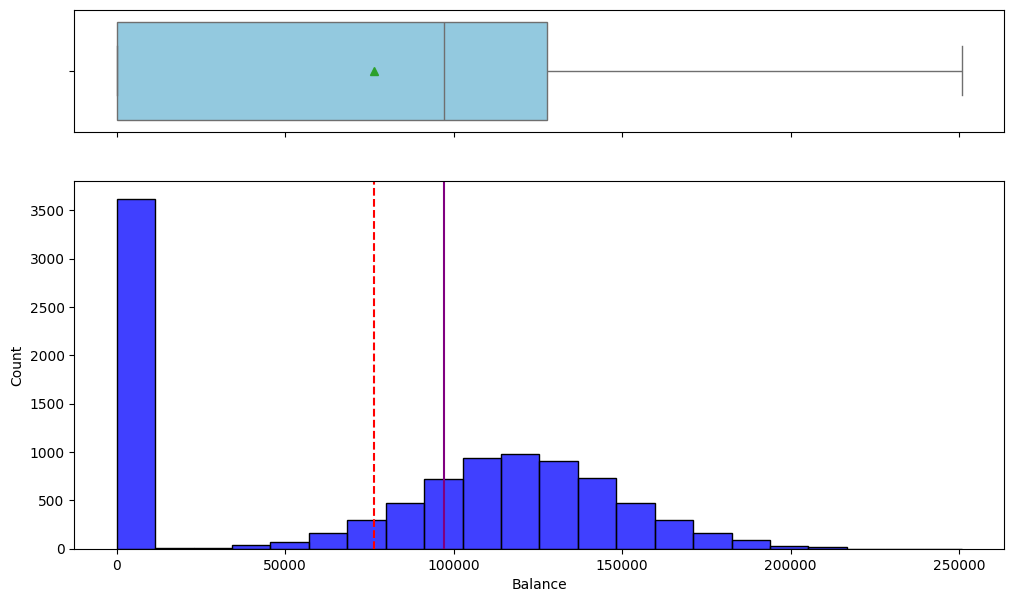

In [23]:
# Observations on Balance
combined_hist_boxplot(ds, "Balance")

**Observations on Balance**

***Distribution Characteristics:*** The "Balance" distribution shows a significant concentration of values at zero, indicating a large number of customers with no balance. Beyond this, the distribution spreads evenly across various balance ranges, not following a normal distribution pattern.

***Central Tendency:*** The median balance, marked by the green triangle in the boxplot, aligns closely with the average balance of approximately £76,485.89, suggesting a central tendency around this value for customers with non-zero balances.

***Outlier Analysis:*** There are no apparent outliers in the balance data, as all data points fall within expected ranges without extreme deviations from the cluster of main balance values.

#### Observation on categorical variables ####

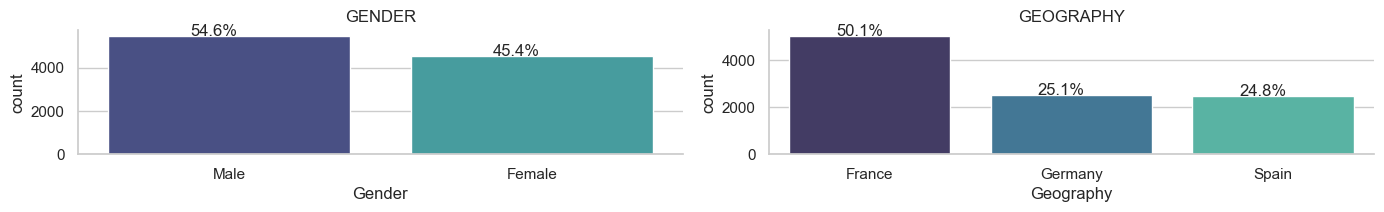

In [25]:
# List of categorical columns to visualize
categorical_features = ['Gender', 'Geography']
# Set the figure size for the plots
plt.figure(figsize=(14, 17))

# Set the theme for the plots
sns.set_theme(style="whitegrid")
for index, feature in enumerate(categorical_features):
    plt.subplot(9, 2, index + 1)
    # Order the bars by descending frequency
    ordered_categories = ds[feature].value_counts(ascending=False).index
    # Create the countplot for each categorical feature with a distinct palette
    plot = sns.countplot(x=ds[feature], data=ds, order=ordered_categories, palette="mako")
    sns.despine(top=True, right=True, left=False)  # Adjust spine visibility for a cleaner look
    # Annotate the bars with percentage labels
    for bar in plot.patches:
        pct = '{:.1f}%'.format(100 * bar.get_height() / len(ds[feature]))  # Calculate percentage
        x = bar.get_x() + bar.get_width() / 2 - 0.05
        y = bar.get_y() + bar.get_height()
        plt.annotate(pct, (x, y), ha='center')
    plt.tight_layout()
    # Set the title to the upper case of the feature name
    plt.title(feature.upper())


**Observations on Categorical Variables**

***Gender Distribution:*** The distribution between Male and Female customers is quite balanced, with males slightly more prevalent at approximately 54.6% compared to females at 45.4%. This small disparity suggests a nearly even gender distribution within the bank's customer base.

***Geographic Distribution:*** France accounts for just over half of the customer base at 50.1%, indicating it as the primary market for the bank. Germany and Spain each make up about a quarter of the customer base, with 25.1% and 24.8% respectively, showing a relatively even distribution among these secondary markets.

### Bivariate Analysis


**Bivariate Observation**

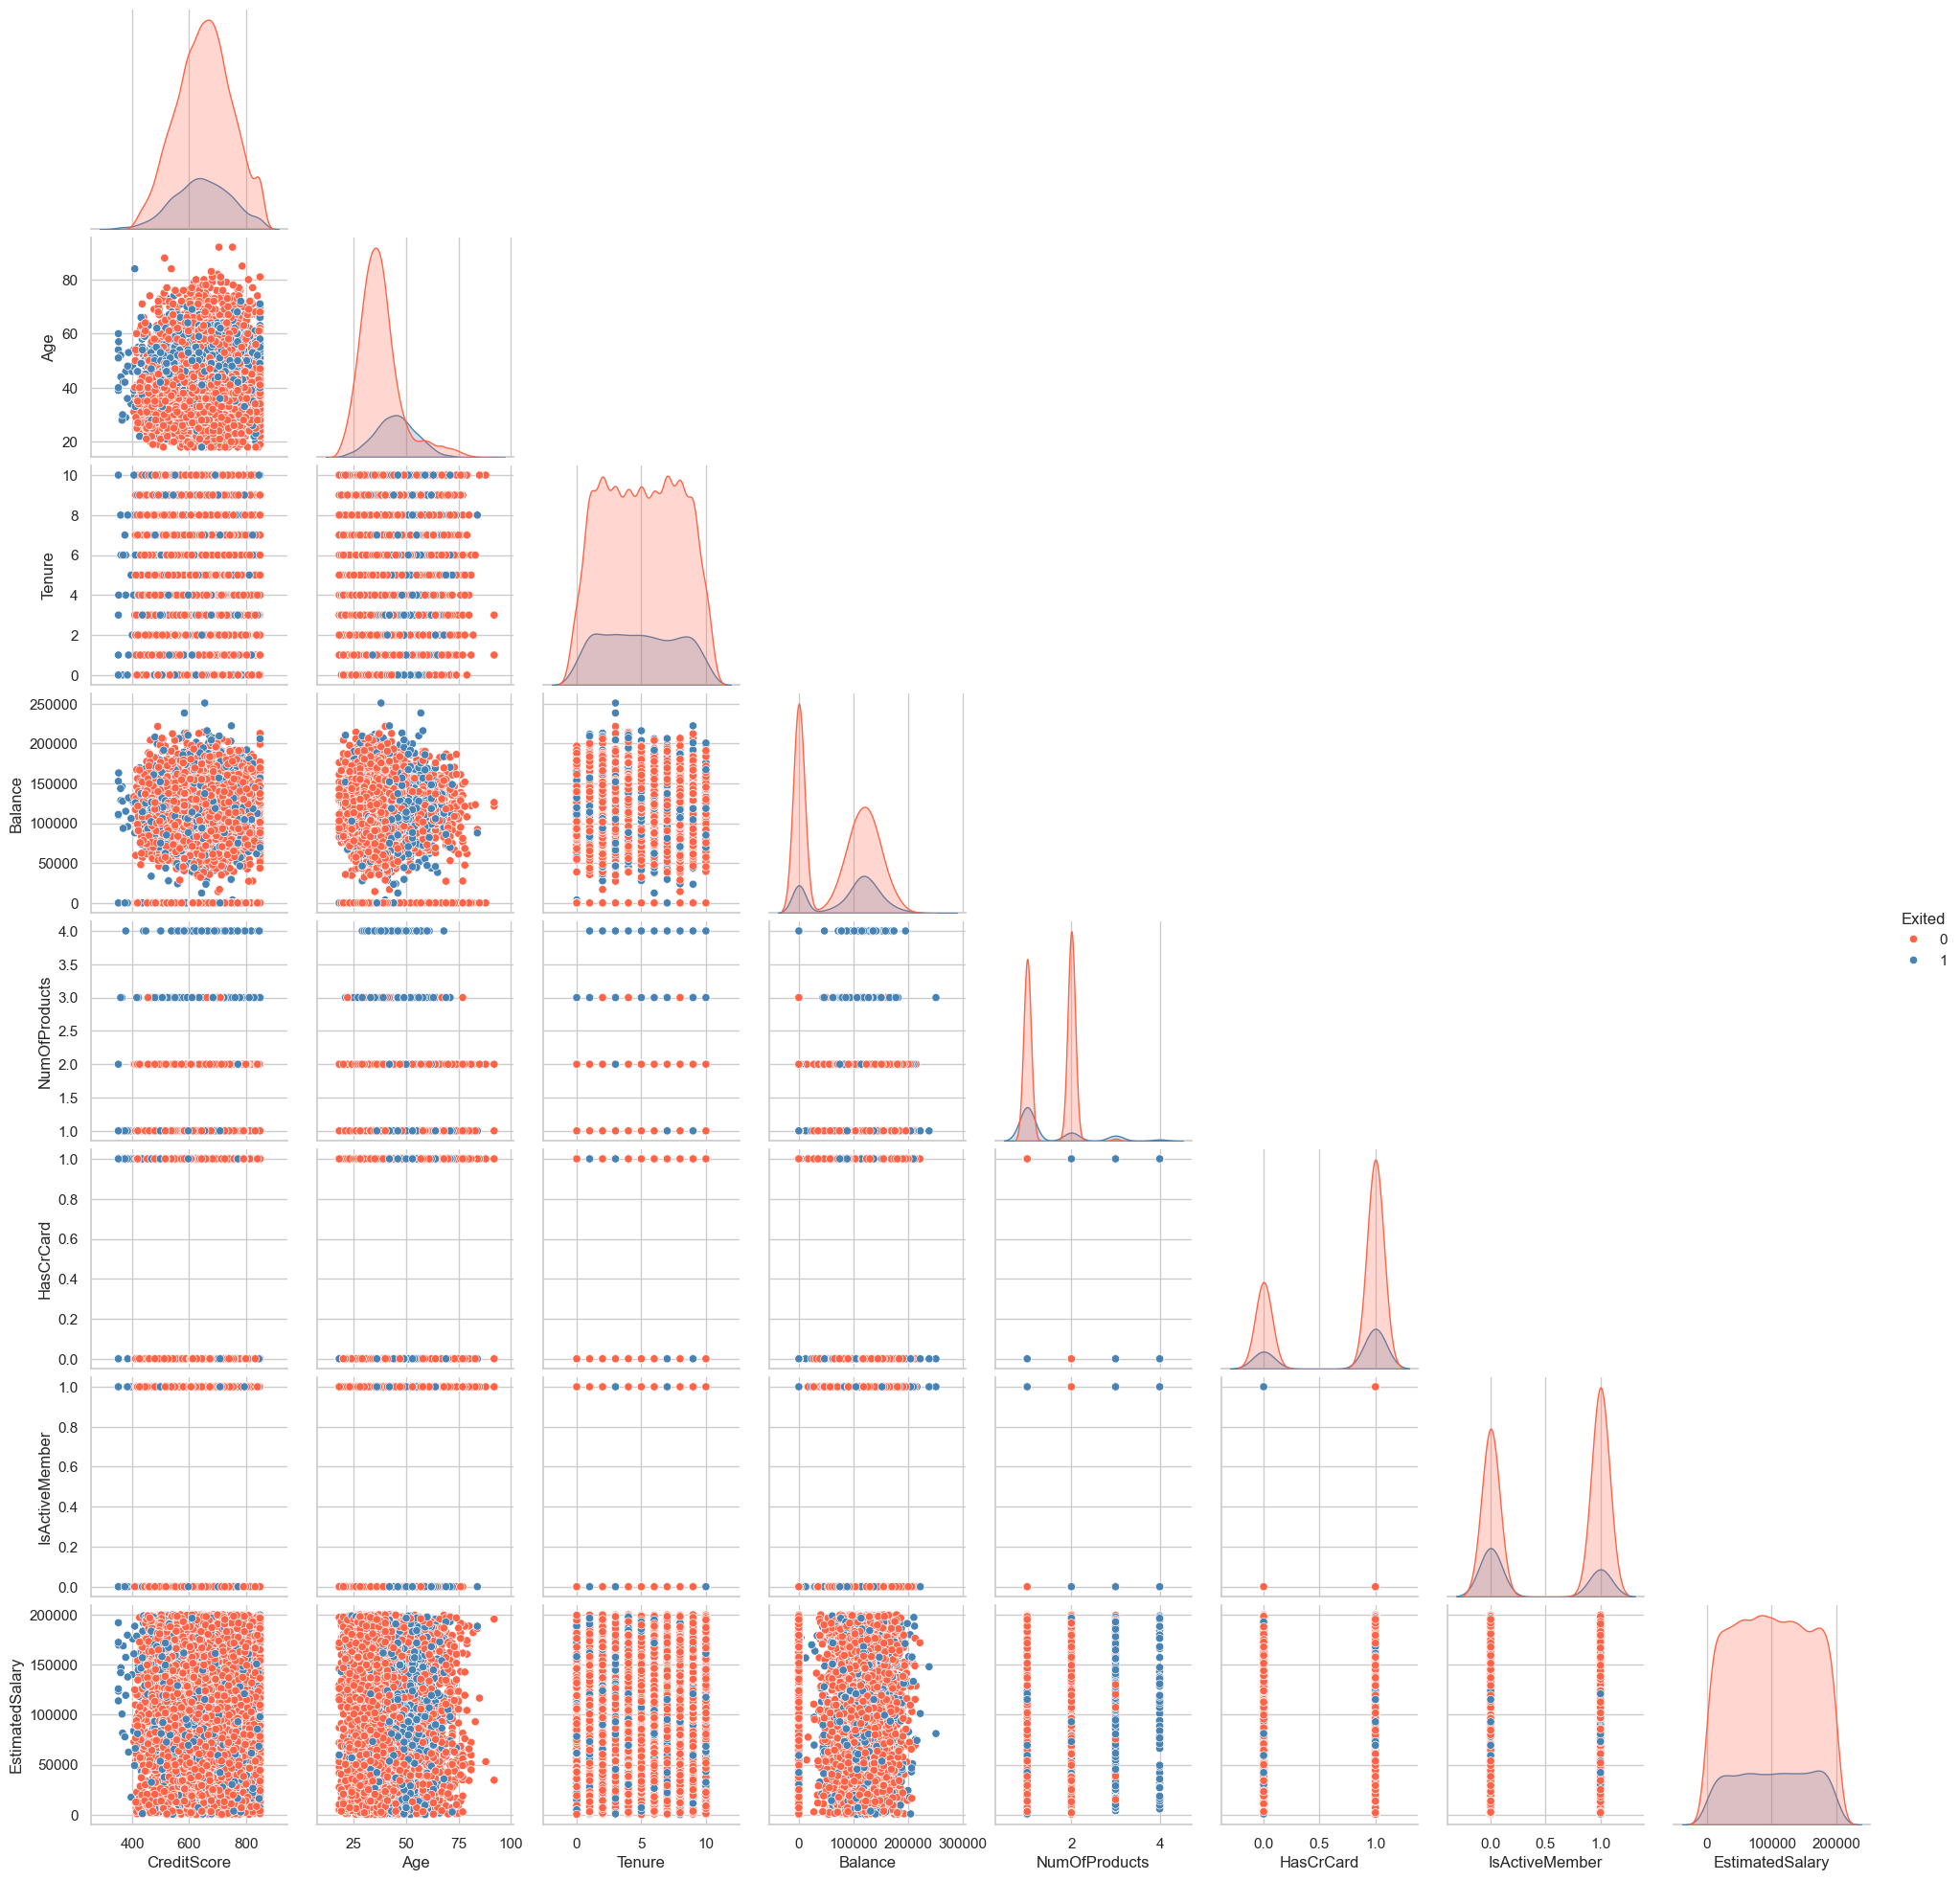

In [29]:
# Generate pairplot to visualize relationships and distribution differences by 'Exited' status.
custom_palette = ["#ff6347", "#4682b4"]  # Tomato red and Steel blue
sns.pairplot(ds, hue="Exited", corner=True, palette=custom_palette)
plt.show()

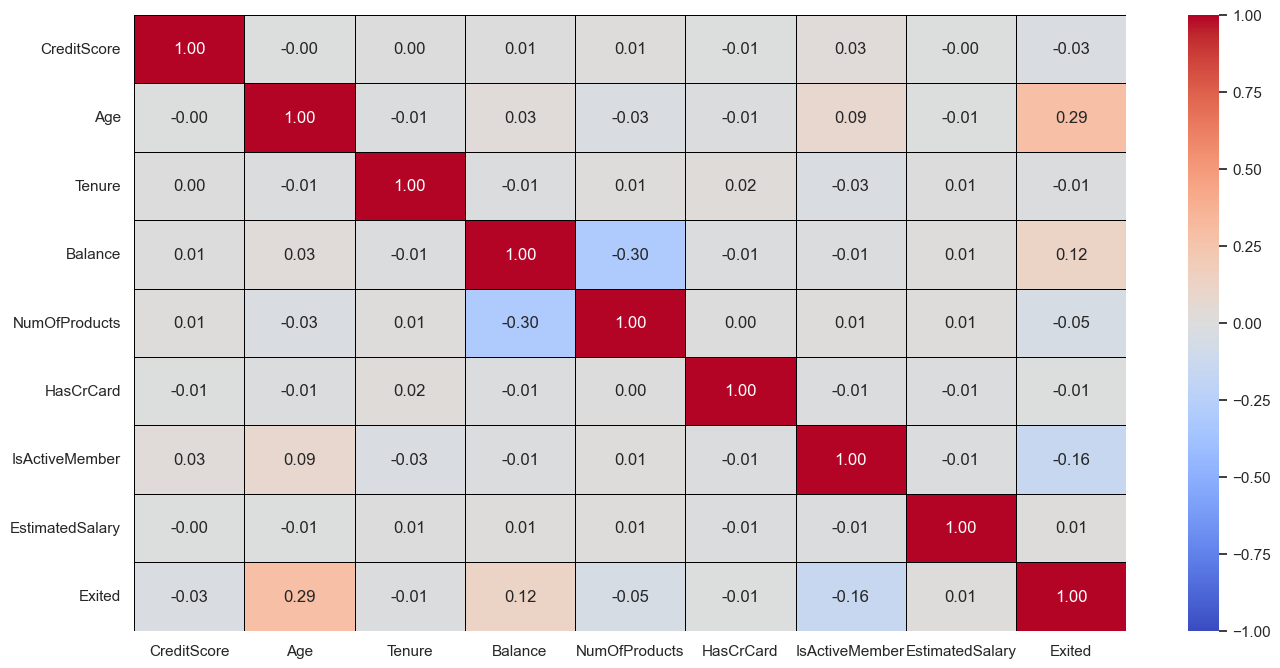

In [30]:
# Set up the plot dimensions
plt.figure(figsize=(16, 8))

# Generate a heatmap for the correlation matrix with customized visuals
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='black')

# Display the heatmap
plt.show()


**Observations on Correlation Matrix**

***Age and Exited Relationship:*** There is a modest positive correlation between 'Age' and 'Exited', suggesting that older customers are slightly more likely to leave the bank.

***Weak Correlation*** Other variables show weak or negligible correlations with each other, indicating no strong linear relationships that could directly influence customer behaviors or decisions within this dataset.

Text(0.5, 1.0, 'Active Membership vs. Exited')

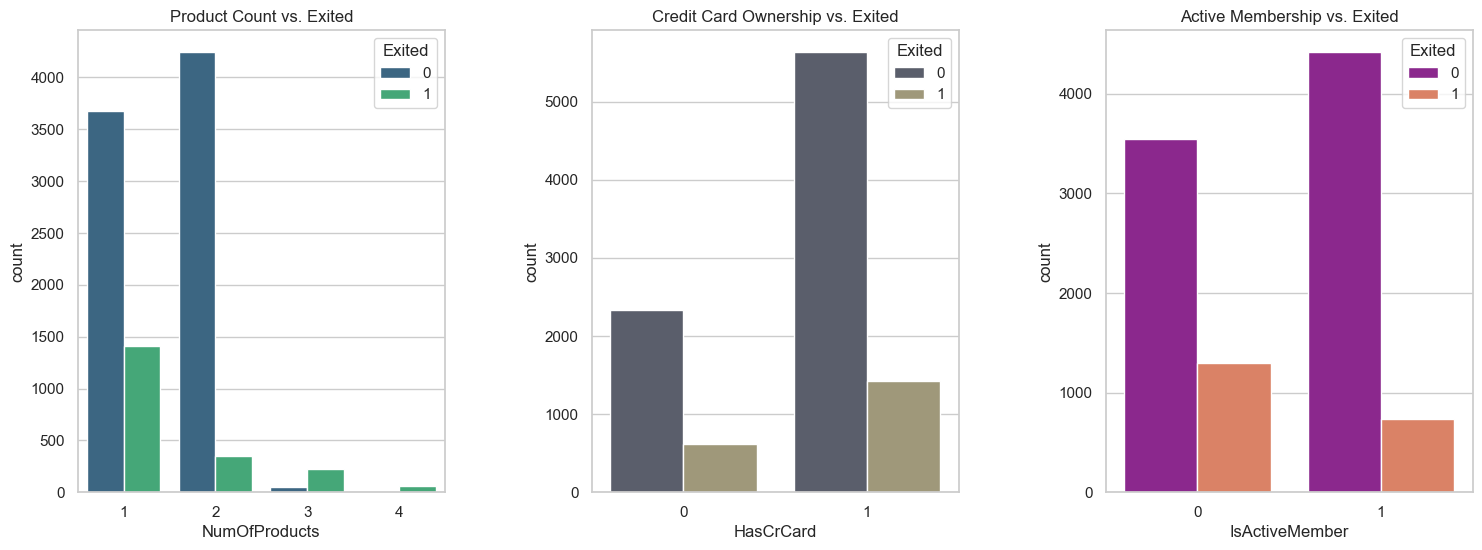

In [31]:
# Create a subplot layout to display three different countplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Adjust space between subplots for better readability
fig.subplots_adjust(wspace=0.4)

# Countplot for the number of products held by customers, colored by 'Exited' status
sns.countplot(x="NumOfProducts", hue="Exited", data=ds, ax=axes[0], palette="viridis")
axes[0].set_title("Product Count vs. Exited")

# Countplot for credit card possession, colored by 'Exited' status
sns.countplot(x="HasCrCard", hue="Exited", data=ds, ax=axes[1], palette="cividis")
axes[1].set_title("Credit Card Ownership vs. Exited")

# Countplot for active membership status, colored by 'Exited' status
sns.countplot(x="IsActiveMember", hue="Exited", data=ds, ax=axes[2], palette="plasma")
axes[2].set_title("Active Membership vs. Exited")


**Observations**

***Product Ownership:*** Customers who exited generally hold fewer products.

***Credit Card Possession:*** Exiting customers are less likely to have credit cards.

***Activity Level:*** Inactivity is more common among customers who have exited.

<Axes: >

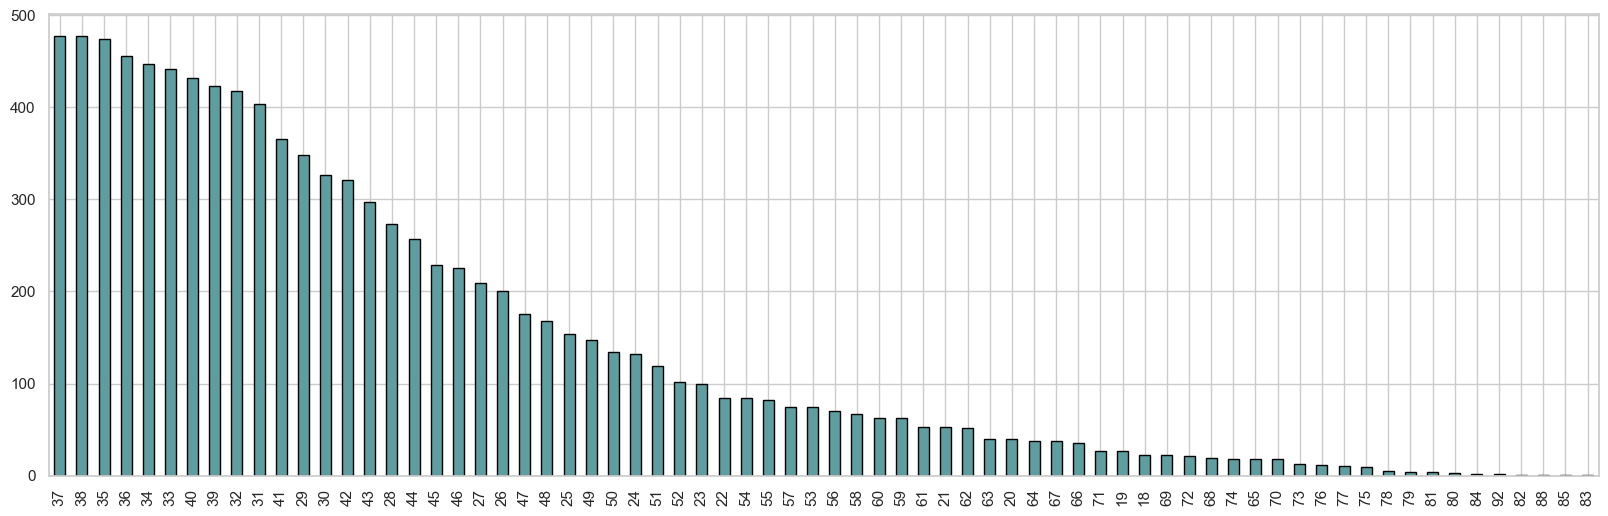

In [33]:
# Plotting distribution of 'Age' using a bar chart with a custom style and size
ds["Age"].value_counts().plot.bar(figsize=(20, 6), color='cadetblue', edgecolor='black')


**Observations on Age Distribution**

***Age Concentration:*** The majority of customers are concentrated between the ages of 30 and 40, showing a high density of bank clients within this age range.

<Axes: xlabel='Exited', ylabel='CreditScore'>

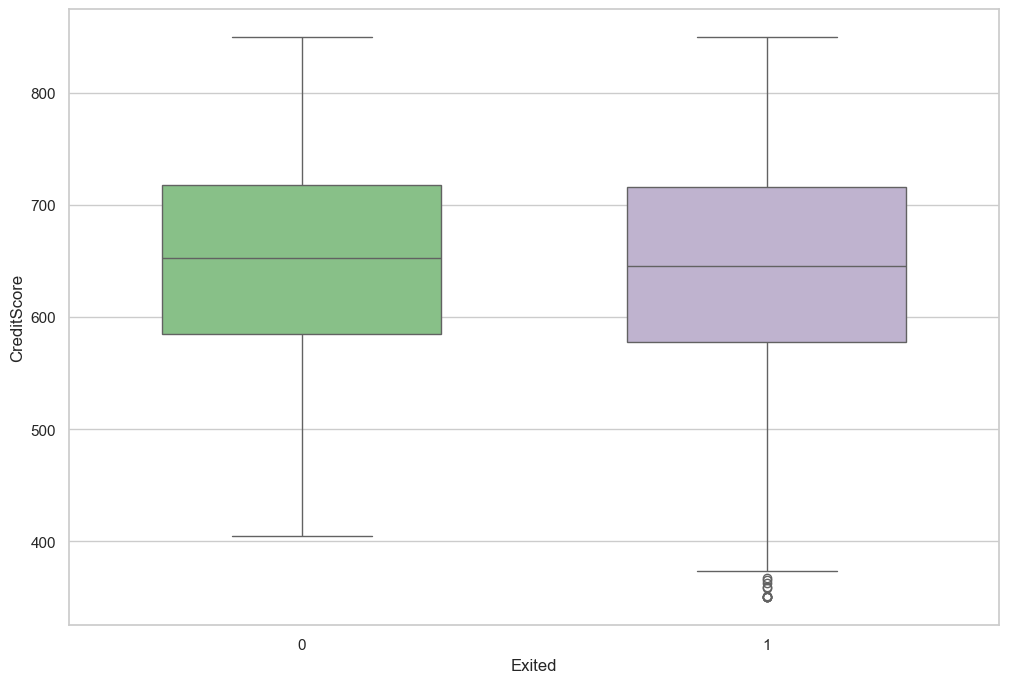

In [34]:
# Displaying boxplots of CreditScore grouped by Exited status with customized style
sns.set(style="whitegrid", rc={"figure.figsize": (12, 8)})
sns.boxplot(x="Exited", y="CreditScore", data=ds, palette="Accent", width=0.6)

**Observation on CreditScore vs. Exited**

***Credit Score Distribution:*** The distribution of credit scores is similar for both customers who have exited and those who have not, indicating that credit score alone does not significantly influence a customer's likelihood to leave the bank.

<Axes: xlabel='Exited', ylabel='Geography'>

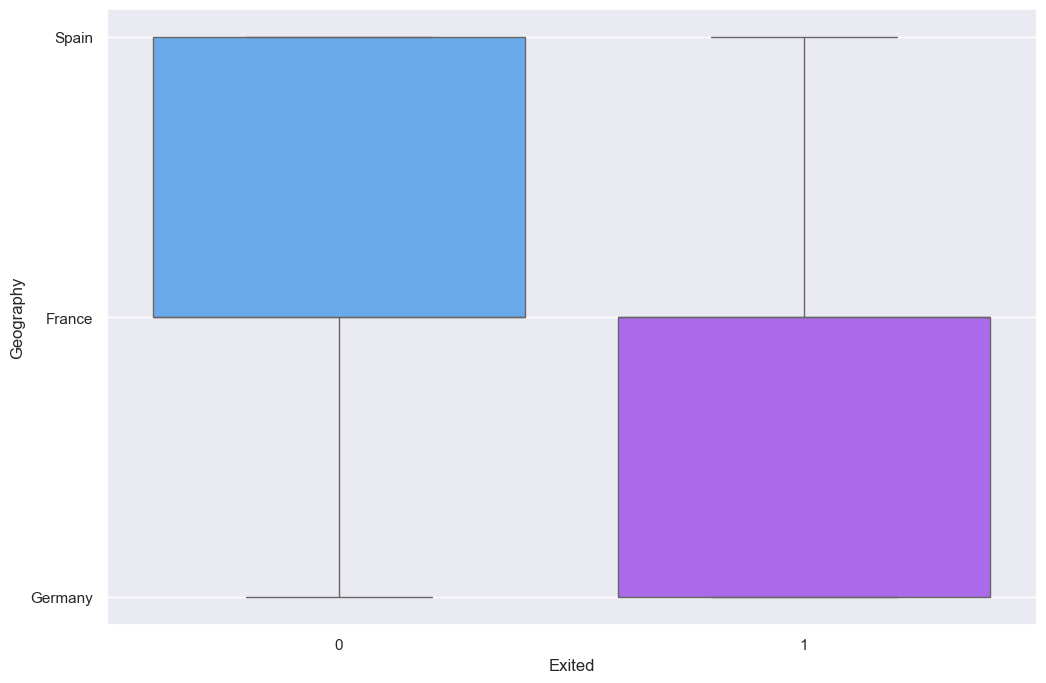

In [35]:
# Display boxplot of 'Geography' distribution for 'Exited' status in a customized visual format
sns.set(style="darkgrid", rc={"figure.figsize": (12, 8)})
sns.boxplot(x="Exited", y="Geography", data=ds, palette="cool", orient="v")


**Observation on Geography vs. Exited**

- **Geographic Impact on Churn**: A higher proportion of customers from Germany have exited compared to those from France and Spain, suggesting a significant geographic influence on customer retention.

<Axes: xlabel='Exited', ylabel='Gender'>

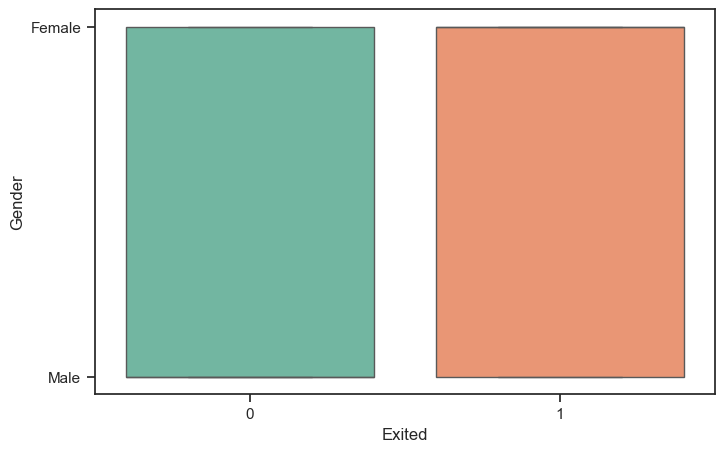

In [37]:
# Plotting boxplot for 'Gender' against 'Exited' with updated visual settings
sns.set(style="ticks", rc={"figure.figsize": (8, 5)})
sns.boxplot(x="Exited", y="Gender", data=ds, palette="Set2", orient="v")


**Observation**

- ***Gender Distribution***: Displays no evident difference in the proportion of males and females who have exited, as both genders show similar distributions across the "Exited" status. 

<Axes: xlabel='Exited', ylabel='Age'>

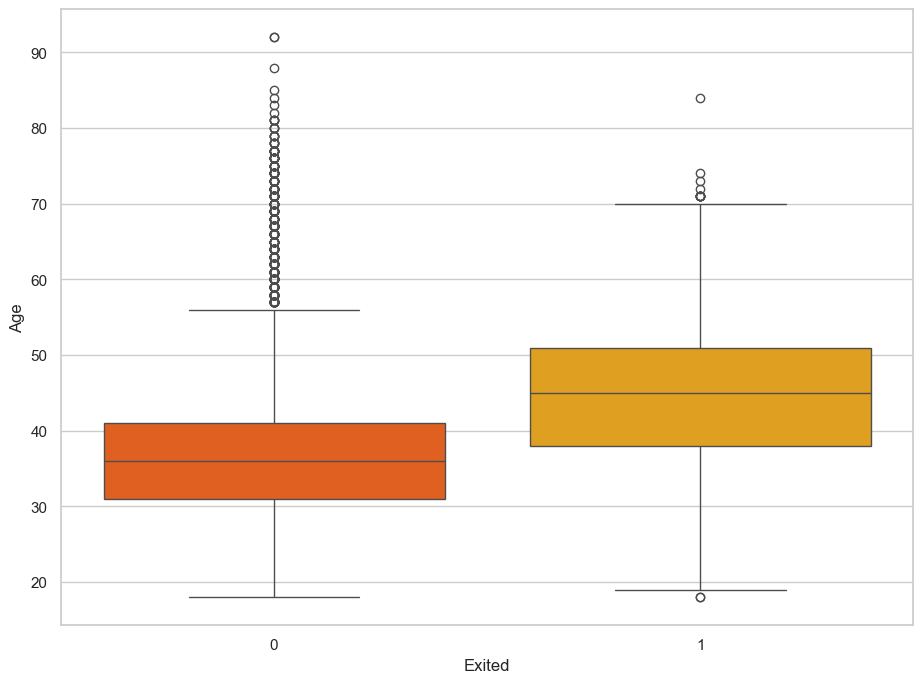

In [38]:
# Display age distribution across 'Exited' statuses 
sns.set(style="whitegrid", rc={"figure.figsize": (11, 8)})
sns.boxplot(x="Exited", y="Age", data=ds, palette="autumn", orient="v")


**Observation**

- **Age Trends**: Customers who exited tend to be older, as shown by the higher median age in the 'Exited' group compared to those who did not exit. 

<Axes: xlabel='Exited', ylabel='NumOfProducts'>

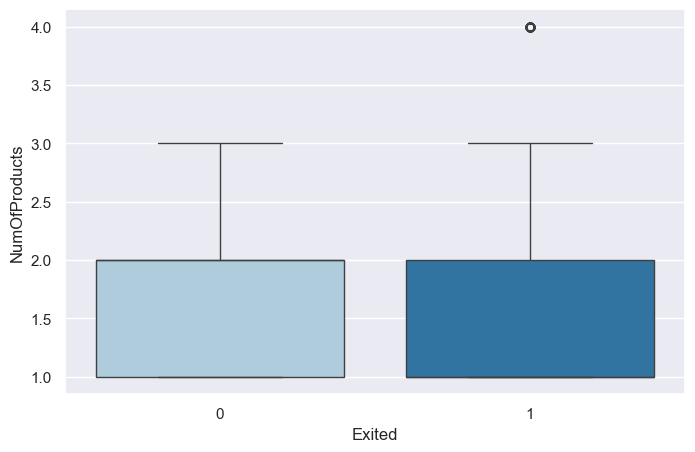

In [40]:
# Plot product count distribution across 'Exited' statuses 
sns.set(style="darkgrid", rc={"figure.figsize": (8, 5)})
sns.boxplot(x="Exited", y="NumOfProducts", data=ds, palette="Paired", orient="v")


**Observation**

- **Product Ownership**: There is no significant difference in the number of products held between customers who exited and those who did not. Both groups have a similar median and range of product ownership.

<Axes: xlabel='Exited', ylabel='Balance'>

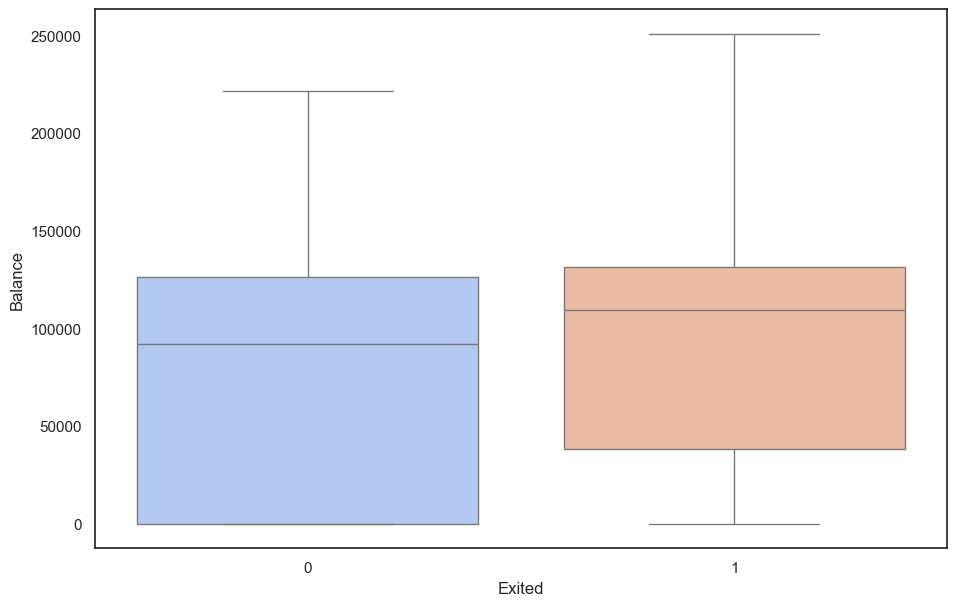

In [41]:
# Plot balance distribution across 'Exited' statuses with customized visuals
sns.set(style="white", rc={"figure.figsize": (11, 7)})
sns.boxplot(x="Exited", y="Balance", data=ds, palette="coolwarm", orient="v")


**Observation**

- **Balance Trends**: Customers who exited have a slightly higher median balance compared to those who did not exit.

<Axes: xlabel='Exited', ylabel='HasCrCard'>

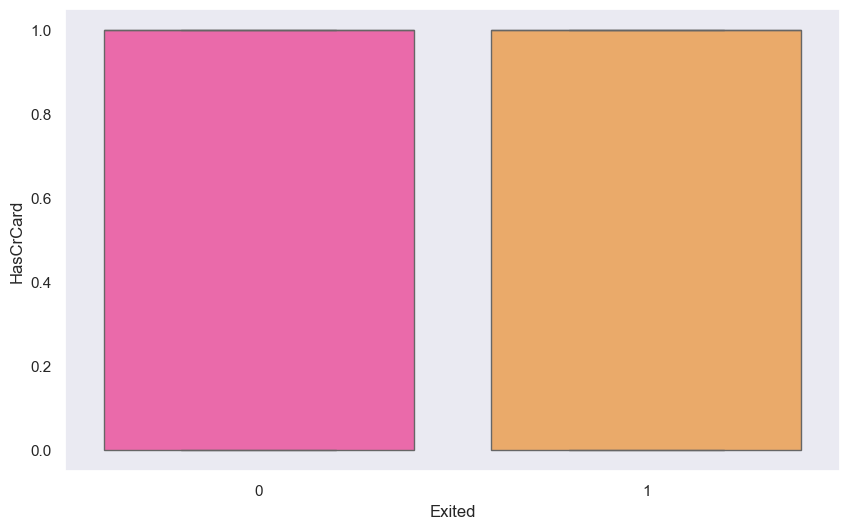

In [43]:
# Display credit card ownership distribution across 'Exited' statuses 
sns.set(style="dark", rc={"figure.figsize": (10, 6)})
sns.boxplot(x="Exited", y="HasCrCard", data=ds, palette="spring", orient="v")


**Observation**

- **Credit Card Ownership**: Having credit card does not significantly influence the likelihood of exiting.

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

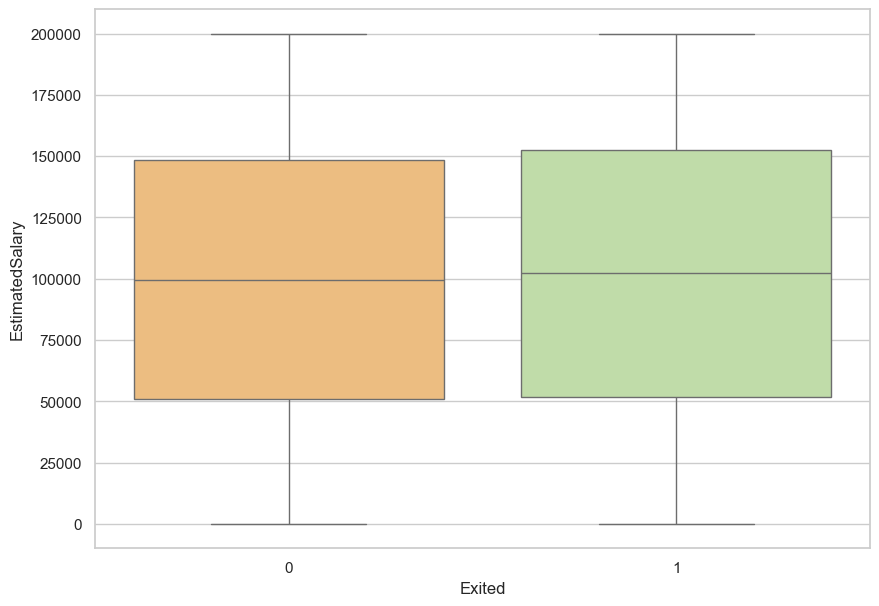

In [44]:
# Visualize the estimated salary distribution across 'Exited' statuses
sns.set(style="whitegrid", rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Exited", y="EstimatedSalary", data=ds, palette="Spectral", orient="v")


**Observation**

- **Salary Distribution**: Estimated salary does not significantly influence the likelihood of a customer exiting the bank.

## Data Preprocessing


### Dummy Variable Creation


In [45]:
# Step 1: Identify Categorical Variables
categorical_vars = ['Geography', 'Gender']

# Step 2: Create Dummy Variables
ds_dummies = pd.get_dummies(ds, columns=categorical_vars, drop_first=True)

# Display the first few rows of the new dataframe to confirm dummy variable creation
ds_dummies.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Train-validation-test Split


In [58]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the features (X) and the target variable (y)
X = ds_dummies.drop('Exited', axis=1)  # Features
y = ds_dummies['Exited'].values  # Target variable as numpy array

# Split the dataset into training (70%) and test (30%) sets
# 'stratify=y' ensures that the class distribution is maintained in the split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Further split the temporary set into validation (50%) and test (50%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shapes of the resulting datasets to confirm the split
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (7000, 11), (7000,)
Validation set shape: (1500, 11), (1500,)
Test set shape: (1500, 11), (1500,)


### Data Normalization

In [60]:
# Import the StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler for features
feature_scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
# This scales the training data to have a mean of 0 and a standard deviation of 1
X_train_scaled = feature_scaler.fit_transform(X_train)

# Transform the validation and test data using the fitted scaler
# This ensures that the validation and test data are scaled using the same parameters as the training data
X_val_scaled = feature_scaler.transform(X_val)
X_test_scaled = feature_scaler.transform(X_test)

# Initialize the StandardScaler for the target variable
target_scaler = StandardScaler()

# Fit the scaler on the training target data and transform it
# This scales the training target data to have a mean of 0 and a standard deviation of 1
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))

# Transform the test target data using the fitted scaler
# This ensures that the test target data are scaled using the same parameters as the training target data
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1))

# Display the first few rows of the scaled training data to confirm normalization
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

# Display the first few rows of the scaled target training data to confirm normalization
print(pd.DataFrame(y_train_scaled, columns=['Exited']).head())


   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.575582 -1.796679 -0.349474  0.312906      -0.912483   0.643094   
1     0.398182  2.269825 -1.386929 -1.223574       0.799493   0.643094   
2     1.693082 -0.756410 -1.386929  0.682321      -0.912483   0.643094   
3     0.740036 -1.796679  0.342162 -1.223574       0.799493   0.643094   
4     0.905783 -1.985818 -0.349474 -1.223574       0.799493   0.643094   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0       -1.034598         1.362512           -0.57823        -0.578890   
1        0.966559         1.515472           -0.57823         1.727444   
2       -1.034598         0.038955           -0.57823        -0.578890   
3       -1.034598         1.671444           -0.57823        -0.578890   
4        0.966559        -0.899384           -0.57823        -0.578890   

   Gender_Male  
0     0.900365  
1    -1.110661  
2     0.900365  
3     0.900365  
4     0.900365  
     Exi

## Model Building


### Model Evaluation Criterion


Write down the logic for choosing the metric that would be the best metric for this business scenario.

-For the bank churn prediction scenario, we will primarily consider the R-squared (R2) value as the primary metric because it indicates how well the model explains the variance in the dependent variable. This is crucial for understanding customer behavior and making informed business decisions. However, in cases where R2 is not applicable or provides extreme values, we will also consider Mean Squared Error (MSE) and loss values to guide the ranking and selection of the best model.


In [51]:
from sklearn.metrics import r2_score, mean_squared_error

def choose_best_metric(y_true, y_pred):
    """
    Choose the best metric for the business scenario.

    y_true: Actual labels
    y_pred: Predicted labels
    """
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    print(f"R-squared (R2): {r2:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    # Choosing the best metric based on the business scenario
    if r2 >= 0:
        best_metric = r2
        metric_name = "R-squared (R2)"
    else:
        best_metric = mse
        metric_name = "Mean Squared Error (MSE)"
    
    print(f"\nChosen Metric: {metric_name} ({best_metric:.2f})")

# Example usage with sample data (replace with actual model predictions)
import numpy as np
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0])  # Actual labels
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1])  # Predicted labels

# Evaluate and choose the best metric
choose_best_metric(y_true, y_pred)


R-squared (R2): 0.20
Mean Squared Error (MSE): 0.20

Chosen Metric: R-squared (R2) (0.20)


### Neural Network with SGD Optimizer


In [52]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

# Clear any existing TensorFlow sessions
K.clear_session()

# Fixing the seed for random number generators to ensure reproducible results
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)



def create_SGD_model():
    """
    Build and compile a neural network model with SGD optimizer.
    """
    # Initialize the Sequential model
    nn_model = Sequential()

    # Adding the input layer with 16 neurons and ReLU activation
    input_layer = Dense(16, input_shape=(X_train_scaled.shape[1],), activation='relu')
    nn_model.add(input_layer)

    # Adding a hidden layer with 8 neurons and ReLU activation
    hidden_layer = Dense(8, activation='relu')
    nn_model.add(hidden_layer)

    # Adding the output layer with sigmoid activation
    output_layer = Dense(1, activation='sigmoid')
    nn_model.add(output_layer)

    # Defining the SGD optimizer with a learning rate of 0.001
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

    # Compiling the model with binary crossentropy loss and mean squared error metric
    nn_model.compile(loss='binary_crossentropy',
                     optimizer=sgd_optimizer,
                     metrics=['mse'])

    return nn_model

# Build and summarize the model
sgd_model = create_SGD_model()
sgd_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Define the number of epochs for training
NUM_EPOCHS = 35

# Fit the neural network model
# 'validation_split=0.2' means 20% of the training data will be used for validation
# 'verbose=1' ensures progress updates are shown during training
training_history = sgd_model.fit(X_train_scaled, y_train, epochs=NUM_EPOCHS, validation_split=0.2, verbose=1)


Epoch 1/35
175/175 [==============================] - 4s 18ms/step - loss: 0.6861 - mse: 0.2466 - val_loss: 0.6526 - val_mse: 0.2307
Epoch 2/35
175/175 [==============================] - 1s 3ms/step - loss: 0.6488 - mse: 0.2287 - val_loss: 0.6229 - val_mse: 0.2165
Epoch 3/35
175/175 [==============================] - 1s 3ms/step - loss: 0.6219 - mse: 0.2157 - val_loss: 0.6011 - val_mse: 0.2061
Epoch 4/35
175/175 [==============================] - 1s 3ms/step - loss: 0.6018 - mse: 0.2061 - val_loss: 0.5848 - val_mse: 0.1983
Epoch 5/35
175/175 [==============================] - 0s 3ms/step - loss: 0.5865 - mse: 0.1987 - val_loss: 0.5721 - val_mse: 0.1923
Epoch 6/35
175/175 [==============================] - 1s 4ms/step - loss: 0.5744 - mse: 0.1930 - val_loss: 0.5619 - val_mse: 0.1876
Epoch 7/35
175/175 [==============================] - 1s 3ms/step - loss: 0.5645 - mse: 0.1883 - val_loss: 0.5537 - val_mse: 0.1838
Epoch 8/35
175/175 [==============================] - 1s 5ms/step - loss: 0

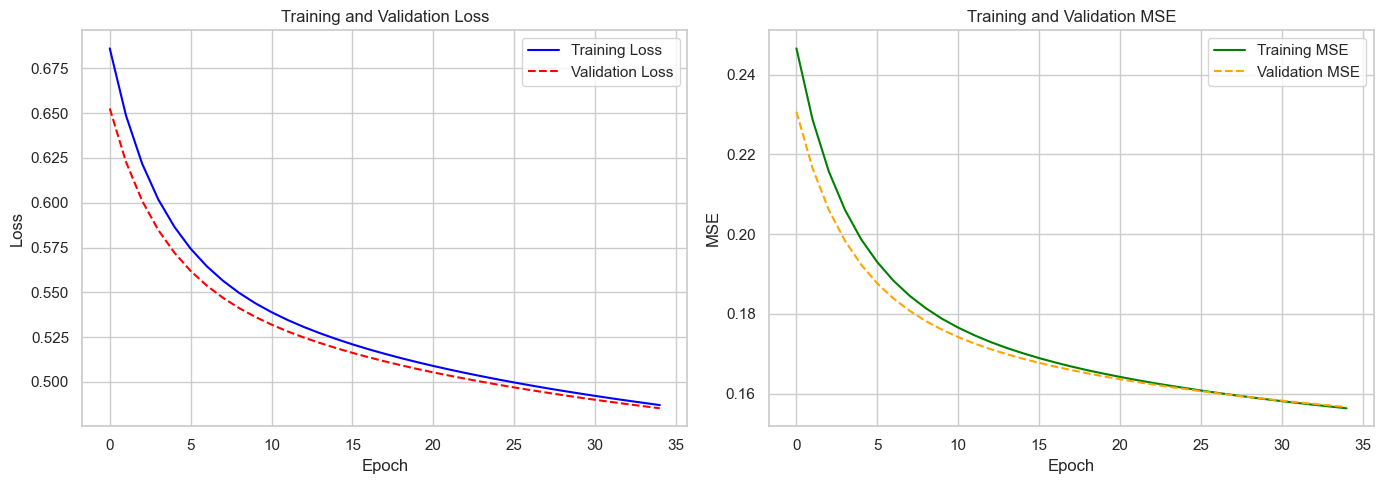

In [54]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(14, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.title('Training and Validation Loss')
plt.plot(training_history.history['loss'], label='Training Loss', color='blue', linestyle='-')
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation mean squared error (mse)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.title('Training and Validation MSE')
plt.plot(training_history.history['mse'], label='Training MSE', color='green', linestyle='-')
plt.plot(training_history.history['val_mse'], label='Validation MSE', color='orange', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Adjust layout for better fit and display
plt.tight_layout()  
plt.show()


In [55]:
# Evaluate the neural network model on the test data
test_loss, test_mse = sgd_model.evaluate(X_test_scaled, y_test)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Mean Squared Error (MSE): {test_mse}")


47/47 [==============================] - 0s 3ms/step - loss: 0.4794 - mse: 0.1539
Test Loss: 0.4794149100780487
Test Mean Squared Error (MSE): 0.1538824439048767


In [61]:
# Predict the target values for the test set using the trained model
predicted_probabilities_SGD = sgd_model.predict(X_test_scaled)

# Reshape and inverse transform the predicted probabilities to get the predicted target values
predicted_targets_SGD = target_scaler.inverse_transform(predicted_probabilities_SGD.reshape(-1, 1))

# Print the predicted target values
print(predicted_targets_SGD)


47/47 [==============================] - 0s 2ms/step
[[0.3577467 ]
 [0.22428104]
 [0.29880032]
 ...
 [0.3042161 ]
 [0.262519  ]
 [0.34756005]]


In [64]:
sklearn.metrics.r2_score(target_scaler.inverse_transform(y_test.reshape(-1, 1)),predicted_targets_SGD)

0.05004313434488927

**Observations**
- The SGD model's test loss is 0.4794 and MSE is 0.1539.
- The R-squared (R2) score is 0.0500, indicating the model explains very little of the variance in the target variable, suggesting poor performance.

## Model Performance Improvement


### Neural Network with Adam Optimizer


In [65]:
# Clear previous TensorFlow sessions to ensure clean model training environment
backend.clear_session()

# Setting seeds to ensure reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [66]:
def create_neural_network():
    # Initialize the neural network model
    neural_net = Sequential()
    # Input layer with He uniform initializer for better convergence with ReLU activation
    neural_net.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
    # Hidden layer
    neural_net.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
    # Output layer for binary classification
    neural_net.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer and binary cross-entropy loss
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    neural_net.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['mse'])

    return neural_net

In [69]:
# Instantiate and build the model
adam_model = create_neural_network()
adam_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Setting the number of epochs for model training
NUM_EPOCHS = 35

# Training the model using the Adam optimizer
training_history = adam_model.fit(X_train, y_train,
                                  epochs=NUM_EPOCHS,
                                  validation_split=0.2,
                                  verbose=1)


Epoch 1/35
175/175 [==============================] - 2s 4ms/step - loss: 1066.0337 - mse: 0.2932 - val_loss: 258.8640 - val_mse: 0.2670
Epoch 2/35
175/175 [==============================] - 0s 3ms/step - loss: 191.6445 - mse: 0.3026 - val_loss: 96.2123 - val_mse: 0.3485
Epoch 3/35
175/175 [==============================] - 0s 3ms/step - loss: 104.1152 - mse: 0.3046 - val_loss: 58.9340 - val_mse: 0.3260
Epoch 4/35
175/175 [==============================] - 0s 2ms/step - loss: 96.7921 - mse: 0.2983 - val_loss: 95.6128 - val_mse: 0.2192
Epoch 5/35
175/175 [==============================] - 1s 3ms/step - loss: 93.2958 - mse: 0.2991 - val_loss: 158.6158 - val_mse: 0.3152
Epoch 6/35
175/175 [==============================] - 0s 3ms/step - loss: 95.2233 - mse: 0.3023 - val_loss: 93.0813 - val_mse: 0.2540
Epoch 7/35
175/175 [==============================] - 0s 3ms/step - loss: 78.4260 - mse: 0.3013 - val_loss: 69.9422 - val_mse: 0.2214
Epoch 8/35
175/175 [==============================] - 1s

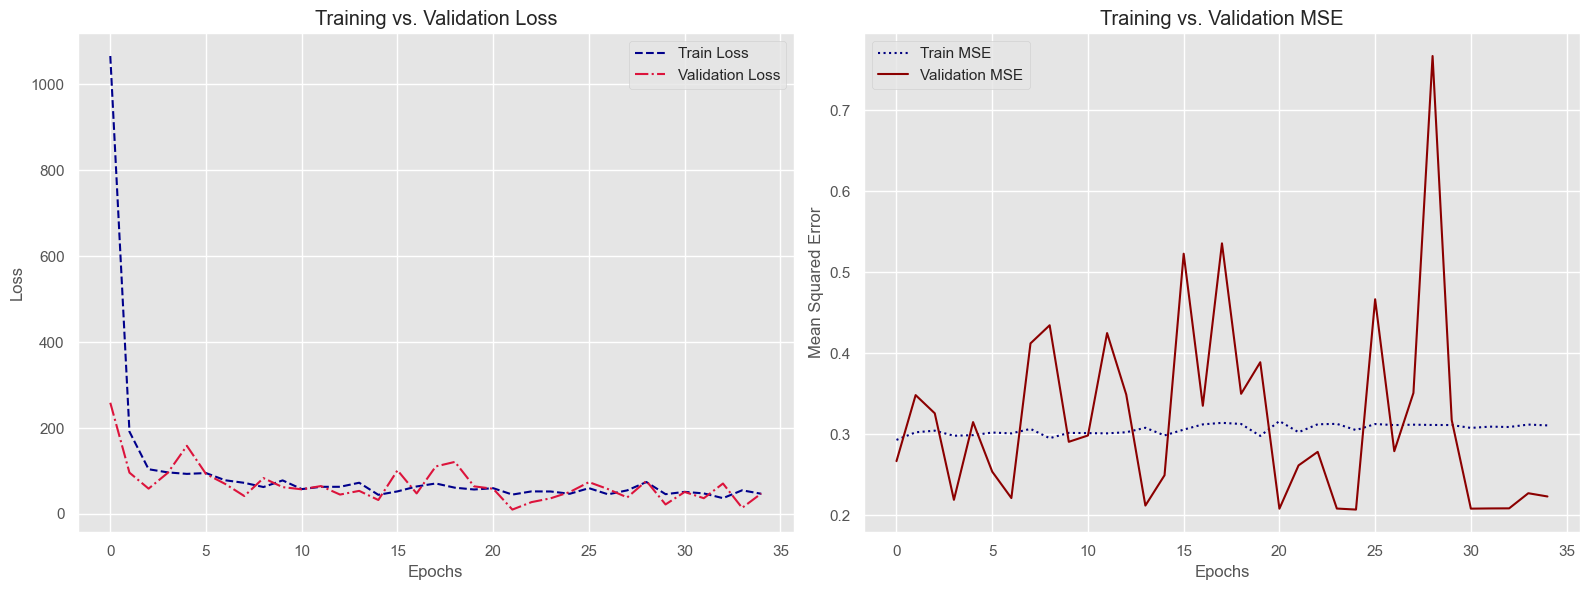

In [74]:
from matplotlib import pyplot as plt

# Adjusting the plot aesthetics for better visualization
plt.figure(figsize=(16, 6))
plt.style.use('ggplot')  # Using 'ggplot' style for a different aesthetic feel

# First subplot for loss metrics
plt.subplot(1, 2, 1)
plt.title('Training vs. Validation Loss')
plt.plot(training_history.history['loss'], label='Train Loss', color='darkblue', linestyle='--')
plt.plot(training_history.history['val_loss'], label='Validation Loss', color='crimson', linestyle='-.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)  # Adding grid for better readability
plt.legend()

# Second subplot for MSE metrics
plt.subplot(1, 2, 2)
plt.title('Training vs. Validation MSE')
plt.plot(training_history.history['mse'], label='Train MSE', color='navy', linestyle=':')
plt.plot(training_history.history['val_mse'], label='Validation MSE', color='darkred', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True)  # Ensuring grid is present for consistency
plt.legend()

# Adjust the layout to make sure everything fits without overlap
plt.tight_layout()
plt.show()

In [77]:
# Evaluate the model on the test dataset and retrieve performance metrics
test_loss, test_mse = adam_model.evaluate(X_test, y_test)

# Display the loss and mean squared error with enhanced output formatting
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Mean Squared Error (MSE): {test_mse:.4f}")


47/47 [==============================] - 0s 2ms/step - loss: 43.1452 - mse: 0.2115
Final Test Loss: 43.1452
Final Mean Squared Error (MSE): 0.2115


In [78]:
# Predict the target values using the model trained with the Adam optimizer
adam_predictions = adam_model.predict(X_test)

# Inverse transform the predictions to convert them back to their original scale
predicted_values_adam = target_scaler.inverse_transform(adam_predictions.reshape(-1, 1))

# Print the inverse-transformed predictions
print("Predicted values (original scale):", predicted_values_adam)


47/47 [==============================] - 0s 3ms/step
Predicted values (original scale): [[0.20371428]
 [0.20371428]
 [0.20371428]
 ...
 [0.20371428]
 [0.20371428]
 [0.20371428]]


In [79]:
from sklearn.metrics import r2_score

# Inverse transform the test labels to their original scale
original_y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the R-squared score for the predictions made by the Adam optimizer model
r2_score_adam = r2_score(original_y_test, predicted_values_adam)

# Print the R-squared score
print("R-squared Score for Adam Optimizer Model:", r2_score_adam)


R-squared Score for Adam Optimizer Model: -0.3055191214718389


### Neural Network with Adam Optimizer and Dropout


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout


## Model Performance Comparison and Final Model Selection


## Actionable Insights and Business Recommendations


-


<font size=6 color='blue'>Power Ahead</font>

---
